<a href="https://colab.research.google.com/github/partha1189/machine_learning/blob/tf_2.0_practice/CNN_Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-09-21 04:49:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 172.217.218.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  56.7MB/s    in 3.4s    

2020-09-21 04:49:28 (56.7 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-09-21 04:49:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to:

In [4]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [5]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-070.png', 'rock04-025.png', 'rock06ck02-001.png', 'rock05ck01-094.png', 'rock03-081.png', 'rock06ck02-020.png', 'rock02-098.png', 'rock06ck02-101.png', 'rock07-k03-038.png', 'rock07-k03-111.png']
['paper03-046.png', 'paper01-068.png', 'paper04-027.png', 'paper05-083.png', 'paper06-046.png', 'paper06-060.png', 'paper04-098.png', 'paper06-095.png', 'paper02-063.png', 'paper02-038.png']
['scissors03-029.png', 'testscissors01-114.png', 'scissors01-055.png', 'testscissors02-013.png', 'scissors03-076.png', 'scissors01-052.png', 'testscissors03-098.png', 'testscissors01-085.png', 'scissors02-030.png', 'scissors01-118.png']


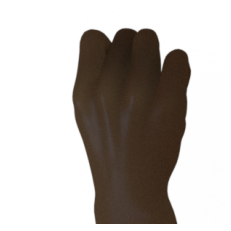

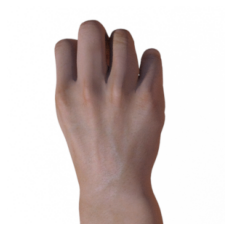

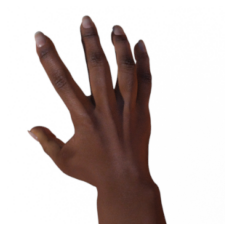

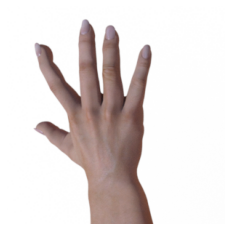

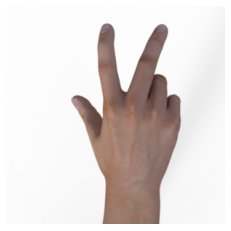

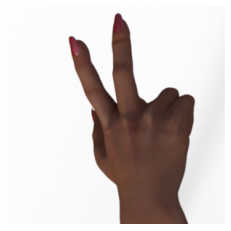

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index - 2 : pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]
for i, img_path in enumerate(next_rock + next_paper + next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [9]:
TRAINING_DIR = "/tmp/rps/"

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


In [11]:
VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size = (150, 150),
                                                    class_mode = 'categorical',
                                                    batch_size = 126)

Found 2520 images belonging to 3 classes.


In [13]:
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 372 images belonging to 3 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),   
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')                             
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 18s 897ms/step - loss: 1.5405 - accuracy: 0.3544 - val_loss: 1.0916 - val_accuracy: 0.5645
Epoch 2/25
20/20 [==============================] - 18s 903ms/step - loss: 1.0865 - accuracy: 0.4218 - val_loss: 0.9983 - val_accuracy: 0.7608
Epoch 3/25
20/20 [==============================] - 18s 901ms/step - loss: 1.0578 - accuracy: 0.4706 - val_loss: 0.8687 - val_accuracy: 0.5188
Epoch 4/25
20/20 [==============================] - 18s 902ms/step - loss: 1.0620 - accuracy: 0.5433 - val_loss: 1.0453 - val_accuracy: 0.3656
Epoch 5/25
20/20 [==============================] - 18s 902ms/step - loss: 0.8560 - accuracy: 0.6095 - val_loss: 0.3811 - val_accuracy: 0.9919
Epoch 6/25
20/20 [==============================] - 18s 901ms/step - loss: 0.7350 - accuracy: 0.6913 - val_loss: 0.2816 - val_accuracy: 0.9355
Epoch 7/25
20/20 [==============================] - 18s 892ms/step - loss: 0.6207 - accuracy: 0.7385 - val_loss: 0.5341 - val_accuracy: 0.6935

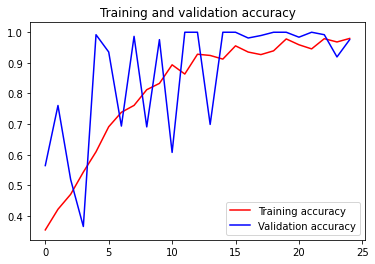

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Test DATA

In [24]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip

--2020-09-21 05:33:30--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 74.125.143.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6623597 (6.3M) [application/zip]
Saving to: ‘rps-validation.zip’

rps-validation.zip  100%[===================>]   6.32M  --.-KB/s    in 0.02s   

2020-09-21 05:33:30 (256 MB/s) - ‘rps-validation.zip’ saved [6623597/6623597]



In [25]:
local_zip = 'rps-validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/test')
zip_ref.close()

In [26]:
TEST_DIR = "/content/test/"
test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
test_generator = test_datagen.flow_from_directory(
	TEST_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=5
)

Found 0 images belonging to 0 classes.


In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving rock6.png to rock6 (1).png
rock6.png
[[0. 1. 0.]]
